In [2]:
# 来自usa.gov数据
path = r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\bitly_usagov\example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [6]:
import json
path = r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\bitly_usagov\example.txt'
records = [json.loads(line) for line in open(path)]
records[0]['tz']

'America/New_York'

In [11]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [34]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
    
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [18]:
len(time_zones)

3440

In [36]:
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [70]:
# 得到前十位的时区及其计数

def top_counts(count_dict,n=10):
    value_key_pairs = [[count,tz] for tz,count in count_dict.items()]
    value_key_pairs.sort(key=lambda x:x[0])
    return value_key_pairs[-n:]

top_counts(counts)

[[33, 'America/Sao_Paulo'],
 [35, 'Europe/Madrid'],
 [36, 'Pacific/Honolulu'],
 [37, 'Asia/Tokyo'],
 [74, 'Europe/London'],
 [191, 'America/Denver'],
 [382, 'America/Los_Angeles'],
 [400, 'America/Chicago'],
 [521, ''],
 [1251, 'America/New_York']]

In [71]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [74]:
# 从一组原始数据中创建DataFrame
from pandas import DataFrame,Series
import pandas as pd
import numpy as np

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [75]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [78]:
# 给记录中未知或有缺失的记录填上一个替代值
clean_tz = frame['tz'].fillna('missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'show'

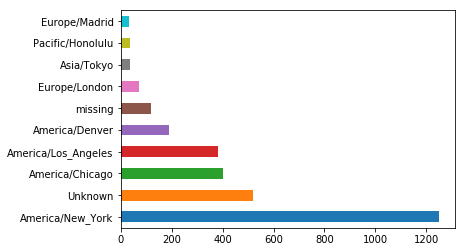

In [80]:
tz_counts[:10].plot(kind='barh', rot=0).show()

In [81]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [82]:
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [84]:
by_tz_os = cframe.groupby(['tz',operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [85]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [87]:
#通过pandas.read_table将各个表分别读到一个pandas
import pandas as pd
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table(r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\movielens\users.dat',sep='::',header=None,names=unames)
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table(r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\movielens\ratings.dat',sep='::',header=None,names=rnames)

mnames = ['movie_id','title','genres']
movies = pd.read_table(r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\movielens\movies.dat',sep='::',header=None,names=mnames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [88]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [90]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [94]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [95]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [96]:
active_titles = ratings_by_title.index[ratings_by_title>=50]
active_titles

Index([''Night Mother (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '187 (1997)',
       ...
       'You've Got Mail (1998)', 'Young Doctors in Love (1982)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Young Sherlock Holmes (1985)', 'Your Friends and Neighbors (1998)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=2514)

In [97]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000


In [100]:
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M,diff
title,,,
Newsies (1992),3.861111,2.666667,-1.194444
"Odd Couple II, The (1998)",3.636364,2.490566,-1.145798
Pet Sematary II (1992),2.833333,1.858696,-0.974638
Air Bud: Golden Receiver (1998),2.833333,1.862745,-0.970588
Blackbeard's Ghost (1968),3.722222,2.820513,-0.901709
"Truth or Consequences, N.M. (1997)",3.375000,2.510204,-0.864796
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Boiling Point (1993),3.400000,2.553571,-0.846429
Dirty Dancing (1987),3.790378,2.959596,-0.830782


In [101]:
import pandas as pd
names1880 = pd.read_csv(r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\babynames\yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [102]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [103]:
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = r'C:\Users\xuwj\python_study\pydata-book-2nd-edition\datasets\babynames\yob%d.txt'%year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 将所有数据整合到单个DataFrame中
names = pd.concat(pieces, ignore_index=True)
    

In [104]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [106]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [108]:
def add_prop(group):
    # 整数除法会向下圆整
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)


In [109]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [110]:
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [111]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [112]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002072327C828>,
      dtype=object)

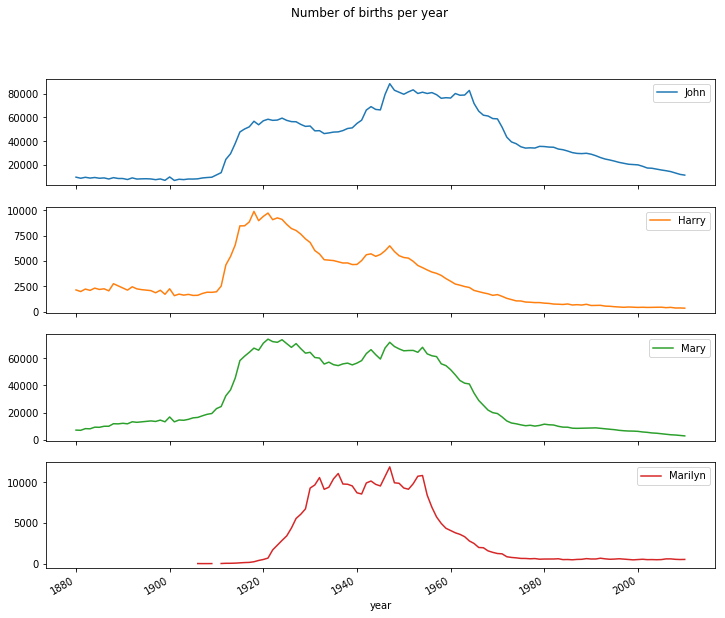

In [113]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


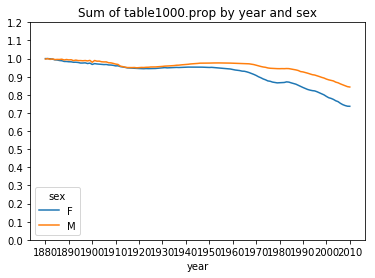

In [115]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


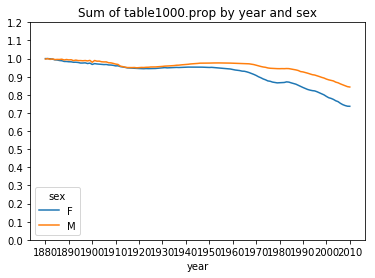

In [118]:
table = top1000.pivot_table('prop', index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))


In [119]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [120]:
# 从name列取出最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [121]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [122]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [123]:
letter_prop = subtable/subtable.sum().astype(float)

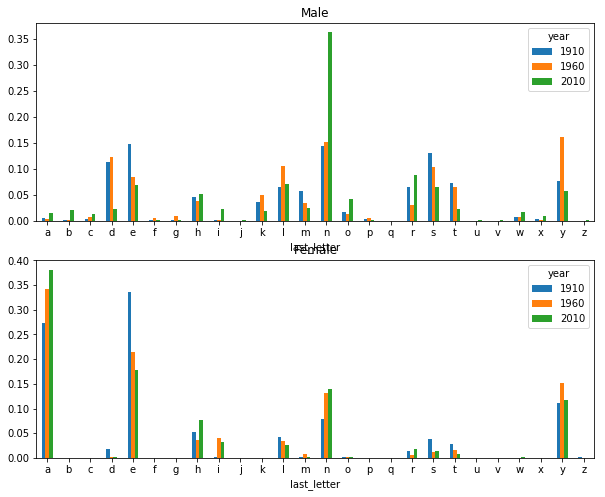

In [124]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend='False')


In [125]:
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


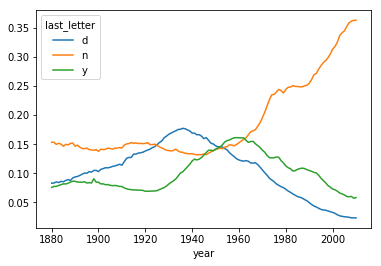

In [126]:
dny_ts.plot()

In [127]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [128]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [130]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
table = table.div(table.sum(1),axis=0)
table.tail()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


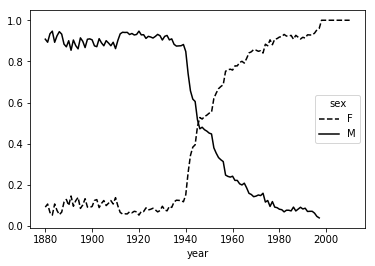

In [131]:
table.plot(style={'M':'k-','F':'k--'})